<center>
    <h1>Boston Dataset Analysis</h1>
</center>

In [1]:
library(MASS)
data(Boston)


In [2]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

<h2>Giải thích các thuộc tính:</h2>

<p>1. crim: Tỉ lệ tội phạm bình quân đầu người trong các khu vực</p>
<p>2. zn: Tỉ lệ đất được quy hoạch theo lô với diện tích trên 25000 feat vuông</p>
<p>3. indus: Tỉ lệ mẫu đất kinh doanh không bán lẻ trên mỗi khu vực</p>
<p>4. chas: (Biến giả), 1 nếu khu vực đó gần với sông, 0 nếu ngược lại</p>
<p>5. nox: Nồng độ nitric oxit trong khu vực</p>
<p>6. rm: Số phòng rung bình trong một căn hộ</p>
<p>7. age: tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940</p>
<p>8. dis: Khoảng cách trung bình đến 5 trung tâm giới thiệu việc làm tại Boston</p>
<p>9. rad: Chỉ số thể hiện độ tiếp cận với các đường cao tốc từ trung tâm thành phố</p>
<p>10. tax: Tổng giá trị thuế suất tài sản từ 10000 USD</p>
<p>11. ptratio: Tỉ lệ giáo viên - học sinh trên mỗi khu vực dân cư</p>
<p>12. black: Được tính bằng công thức 1000(Bk — 0.63)² trong đó Bk là tỉ lệ người da đen trong khu vuẹc</p>
<p>13. lstat: Tỉ lệ số người có địa vị xã hội thấp kém trong khu vực (Tỉ lệ dân trí thấp)</p>
<div>
<p>14. medv: Giá trị trung bình của những ngôi nhà đã được sở hữu (tính bằng đơn vị 1000 USD)</p>
</div>

<h2>Bài toán đặt ra:<h2>
<h3>1. Chọn ra những thuộc tính dự báo biến MEDV tốt nhất nếu áp dụng hồi quy tuyến tính</h3>
<h3>2. Từ các thuộc tính đã được chọn, xây dựng một mô hình hồi quy tuyến tính để dự báo</h3>


<h1> 1. Tìm hiểu những thông tin cơ bản về dữ liệu Boston: </h1>

<h3>1.1 Số lượng dòng và cột</h3>

In [3]:
dim(Boston)

[1] 506  14

<h3>1.2 Thống kê mô tả số liệu các biến</h3>

In [4]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

<p>Từ bảng trên có thể thấy, thuộc tính zn có đến 50% lượng dữ liệu chắc chắn bằng 0, còn biến chas thì có đến 75% lượng dữ liệu chắc chắn bằng 0, do đó, 2 thuộc tính này sẽ không có quá nhiều ý nghĩa cho việc dự báo thuộc tính medv, nên ta sẽ loại bỏ chúng</p>

In [5]:
df = Boston[names(Boston) != 'zn' & names(Boston) != 'chas']
names(df)

[1] "crim"    "indus"   "nox"     "rm"      "age"     "dis"     "rad"    
 [8] "tax"     "ptratio" "black"   "lstat"   "medv"

<h2>2. Làm sạch dữ liệu</h2>

<h3>2.1 Phát hiện và xử lý dữ liệu trống</h3>

In [6]:
num_of_null = c()
for (i in 1:length(df)) {
    num_of_null = append(num_of_null, sum(is.na(df[i])))
    
}   

data.frame(names(df), num_of_null)

names.df.,num_of_null
crim,0
indus,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0
ptratio,0
black,0


Nhận thấy dữ liệu trên không có dữ liệu trống nào

<h3>2.2 Loại bỏ các quan sát bất thường (điểm đột biến) </h3> 

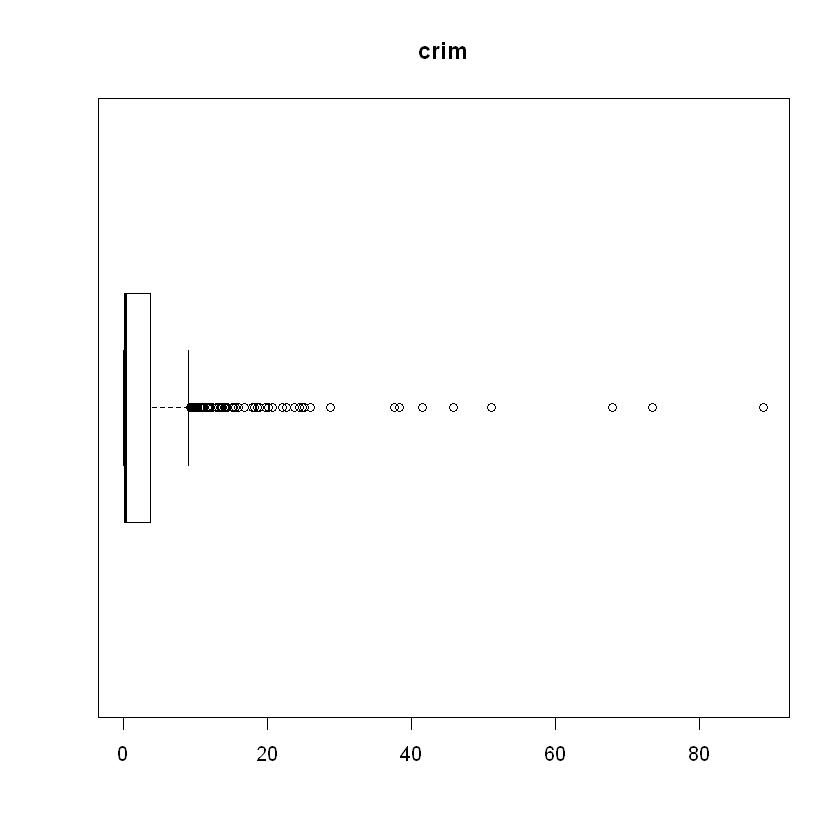

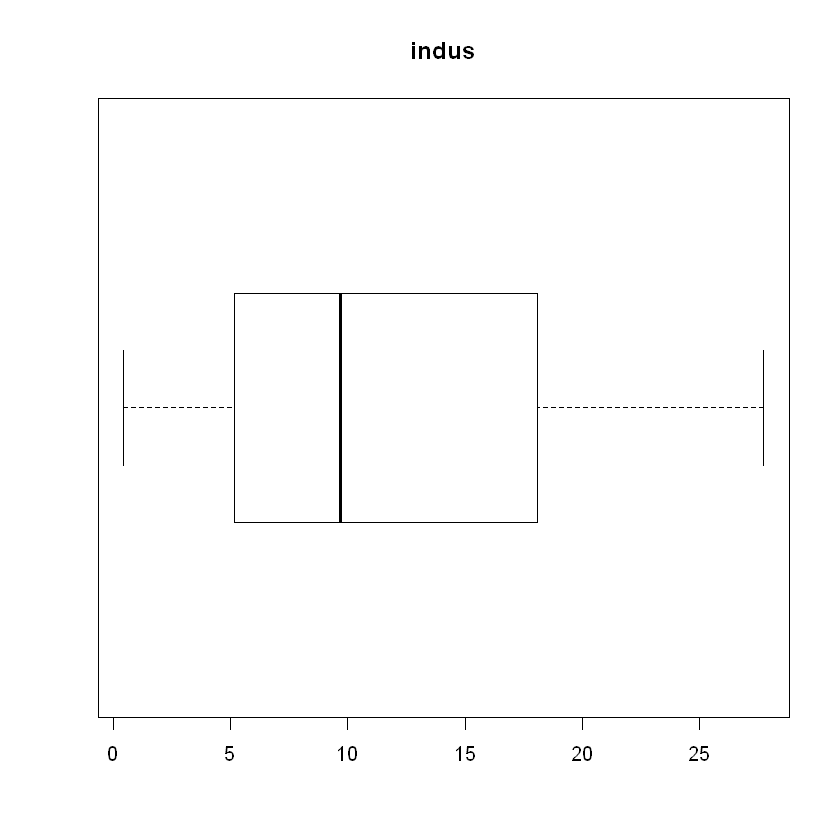

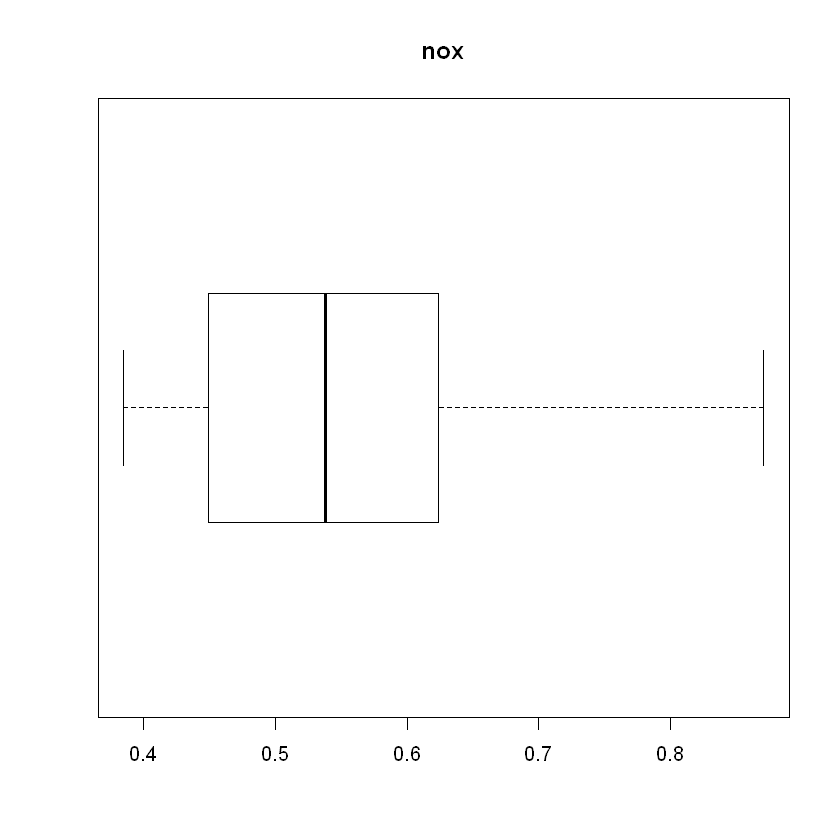

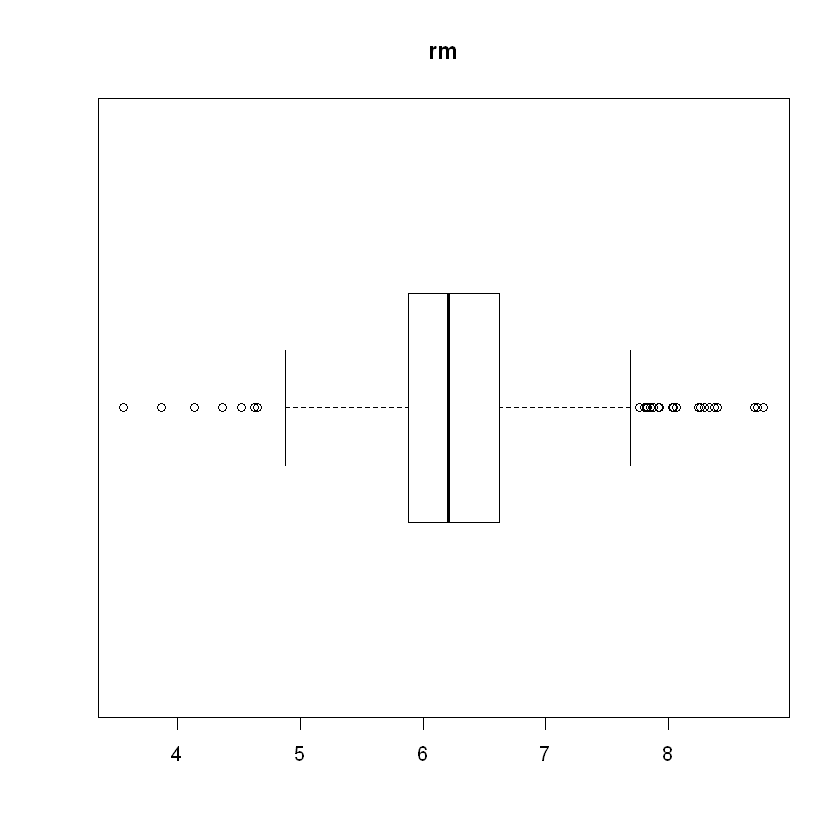

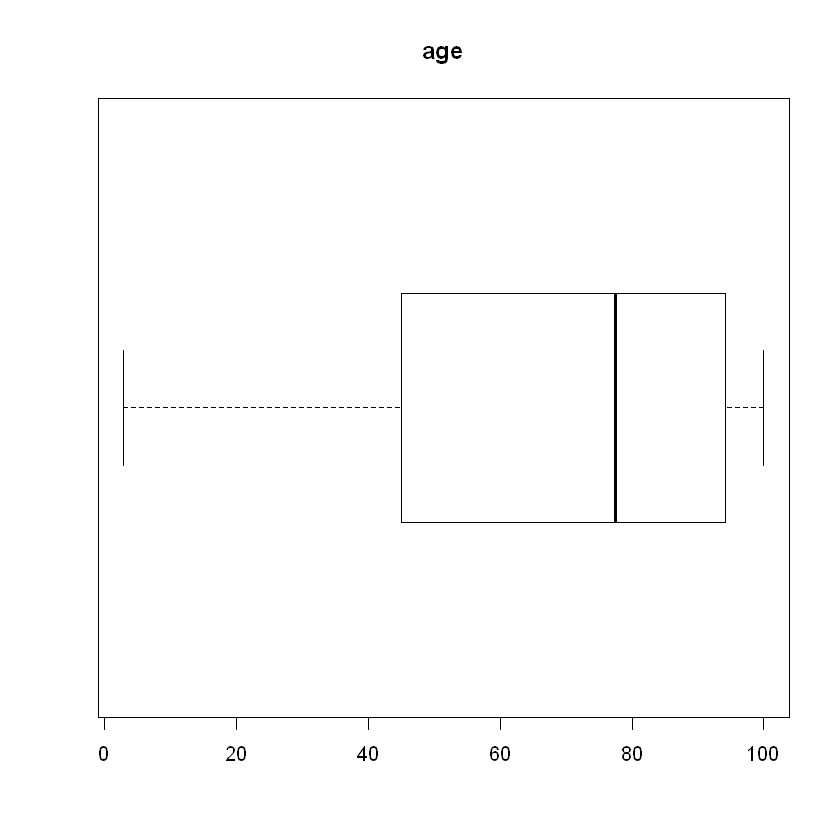

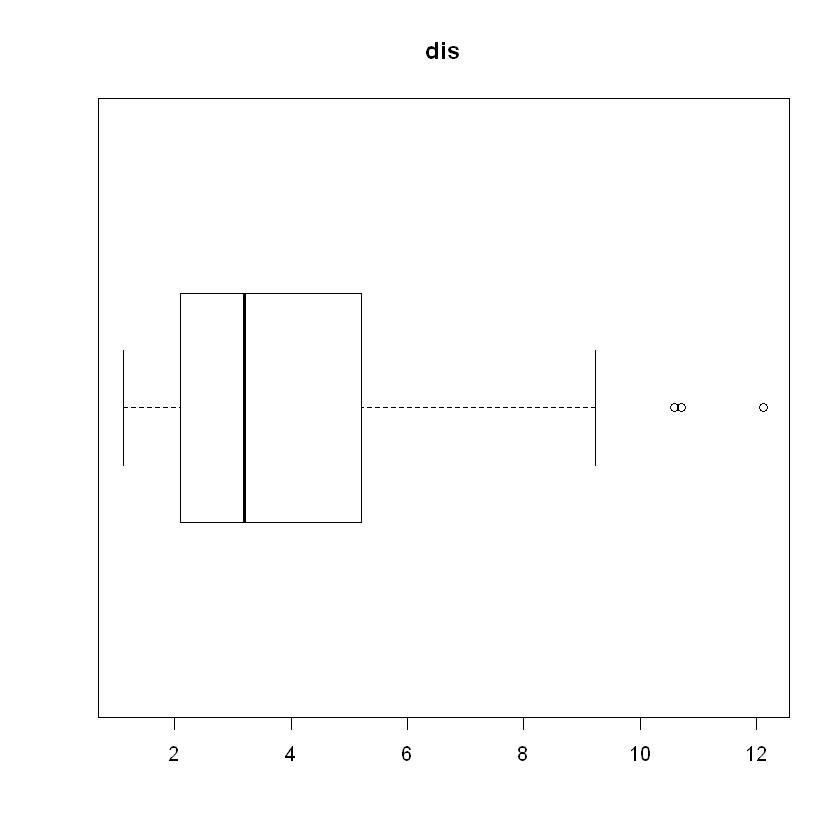

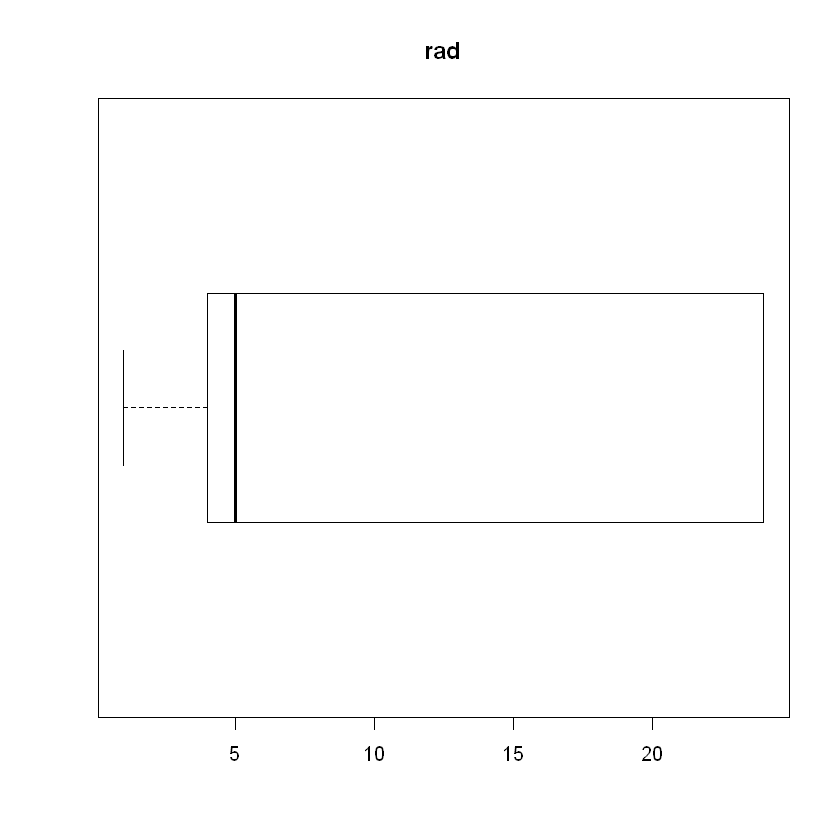

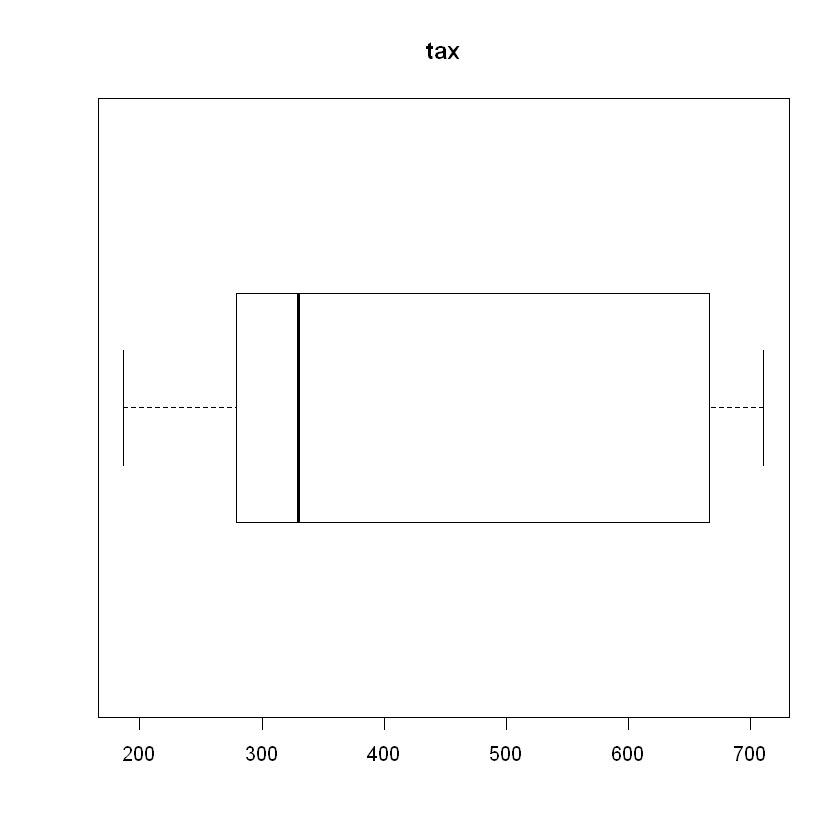

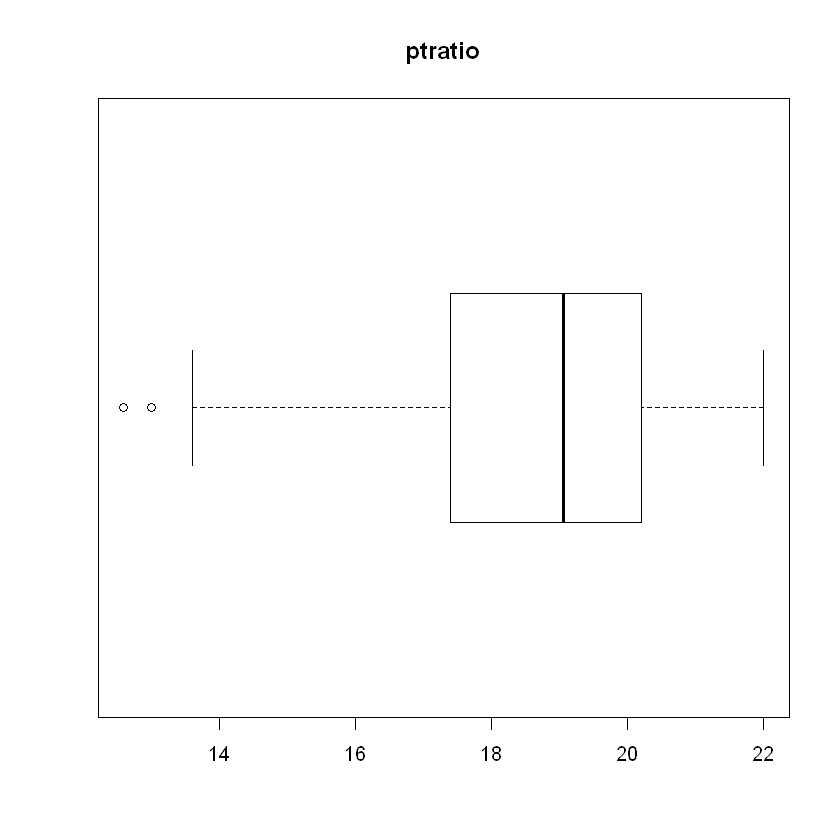

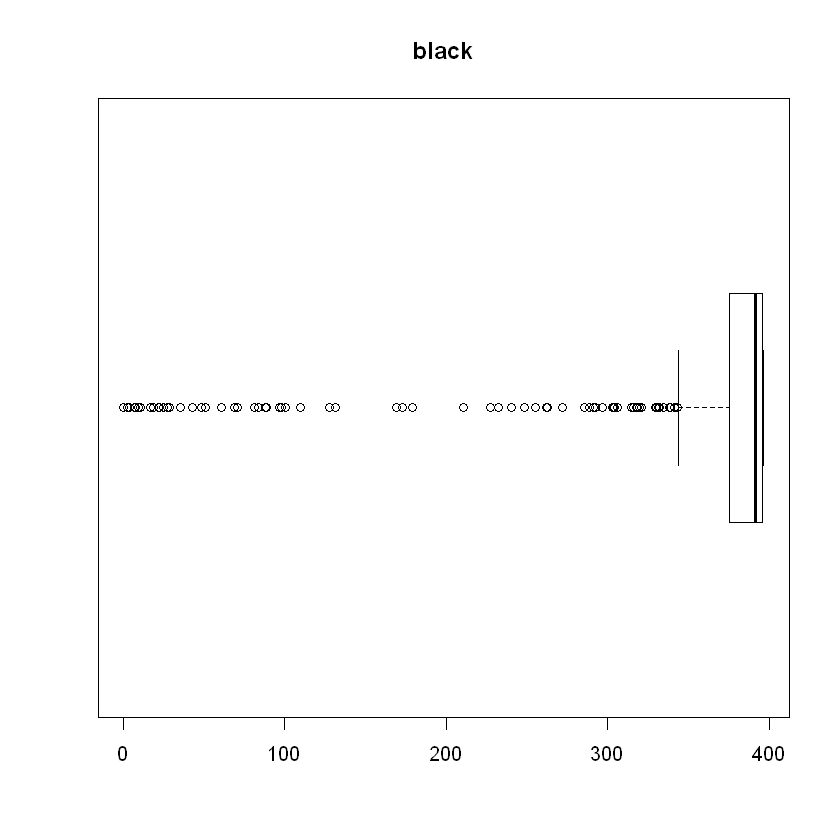

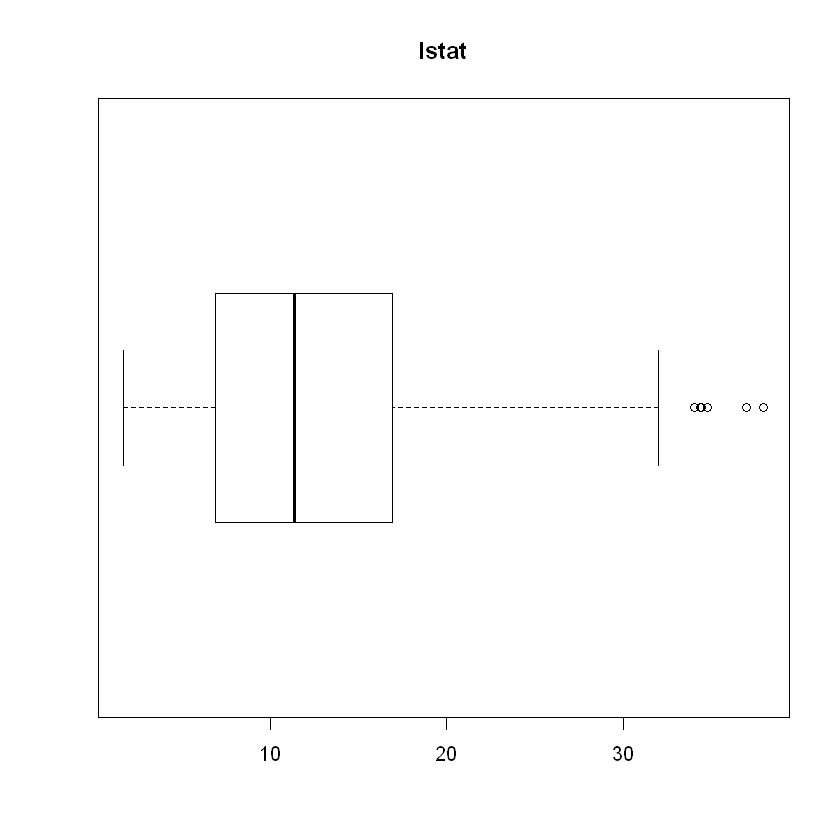

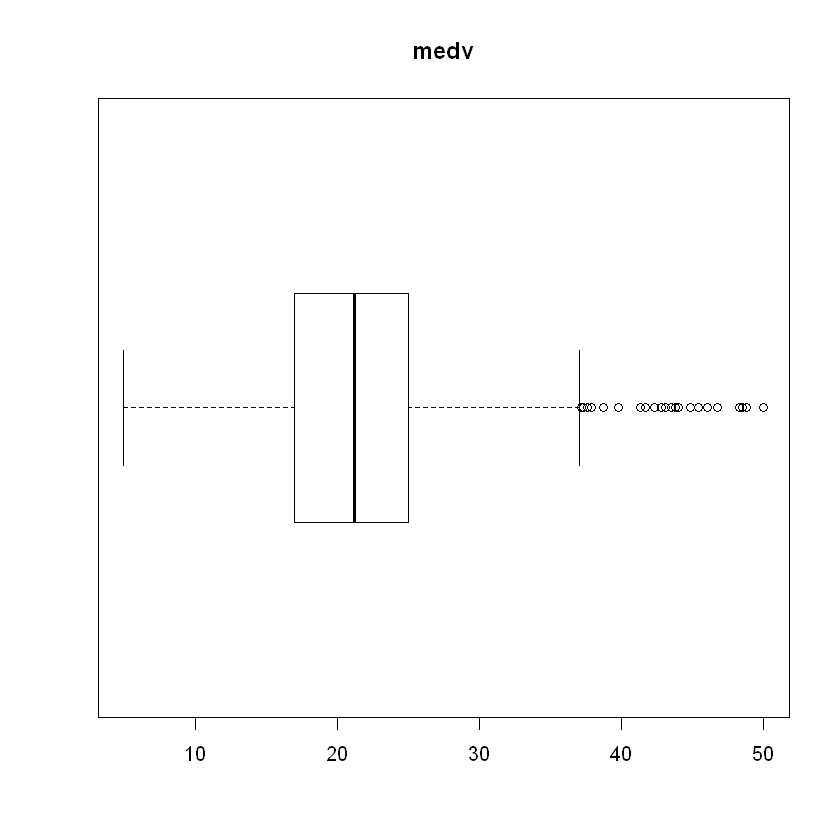

In [7]:
for (i in 1:length(df)) {
    boxplot(df[i], horizontal = T, las = 1, main = names(df[i]))
    
}   


####  Từ kết quả trên, ta thấy các cột CRIM, RM, DIS, PTRATIO, BLACK, LSTAT và MEDV có các quan sát bất thường.

Tiếp theo, ta sẽ tiến hành tính số phần trăm quan sát bất thường trên tổng số lượng quan sát tại các cột

In [8]:
percentage.of.outliers = c()
for (i in 1:length(df)) {
    quartiles <- quantile(df[[i]], probs=c(.25, .75), na.rm = FALSE)
    Q <- IQR(df[[i]])
 
    lower.bound <- quartiles[1] - 1.5*Q
    upper.bound <- quartiles[2] + 1.5*Q 
    out.num = length(df[[i]][df[[i]] > upper.bound]) + length(df[[i]][df[[i]] < lower.bound])
    prop = round((out.num / length(df[[i]])) * 100, 2)
    percentage.of.outliers = append(percentage.of.outliers, prop)
    
}   

data.frame(names(df), percentage.of.outliers)

names.df.,percentage.of.outliers
crim,13.04
indus,0.00
nox,0.00
rm,5.93
age,0.00
dis,0.99
rad,0.00
tax,0.00
ptratio,2.96
black,15.22


Do ở các cột crim, cột black, tỉ lệ của các quan sát bất thường nằm ngoài phạm vi 1.5 * Q cũng khá lớn, nên ở các cột này, ta sẽ chỉ loại bỏ các quan sát "thực sự" bất thường (Nghĩa là có độ lệch khá cao so với các điểm trung bình, trung vị)

In [9]:
quartiles <- quantile(df$crim, probs=c(.25, .75), na.rm = FALSE)
Q <- IQR(df$crim)
 
lower <- quartiles[1] - 3*Q
upper <- quartiles[2] + 3*Q 

    
df <- subset(df, df$crim > lower & df$crim < upper)



In [10]:
dim(df)

[1] 476  12

In [11]:
quartiles <- quantile(df$black, probs=c(.25, .75), na.rm = FALSE)
Q <- IQR(df$black)
 
lower <- quartiles[1] - 3*Q
upper <- quartiles[2] + 3*Q 

    
df <- subset(df, df$black > lower & df$black < upper)


In [12]:
dim(df)

[1] 425  12

Ta đã tiến hành loại bỏ đi 81 quan sát có độ bất thường lớn

<h2>3. Lựa chọn các biến phù hợp với medv <h2>

#### Sử dụng forward elimination

In [13]:
model.0 = lm(medv ~ 1, data = df)
model.full = lm(medv ~ ., data = df)


step(model.0, scope = list(lower = model.0, upper = model.full), direction = 'forward')

Start:  AIC=1850.56
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ rm       1   18828.2 14085 1491.8
+ lstat    1   15589.8 17323 1579.8
+ ptratio  1    7335.6 25578 1745.4
+ indus    1    4812.2 28101 1785.4
+ tax      1    3207.6 29706 1809.0
+ nox      1    2911.9 30001 1813.2
+ age      1    2401.3 30512 1820.4
+ crim     1    2176.4 30737 1823.5
+ rad      1    1194.9 31718 1836.8
+ dis      1     363.5 32550 1847.8
<none>                 32913 1850.6
+ black    1      91.3 32822 1851.4

Step:  AIC=1491.83
medv ~ rm

          Df Sum of Sq   RSS    AIC
+ lstat    1   2364.90 11720 1415.7
+ ptratio  1   1415.41 12670 1448.8
+ tax      1    597.08 13488 1475.4
+ age      1    574.96 13510 1476.1
+ indus    1    420.40 13665 1481.0
+ crim     1    396.89 13688 1481.7
+ nox      1    321.19 13764 1484.0
+ rad      1    243.12 13842 1486.4
<none>                 14085 1491.8
+ black    1     31.90 14053 1492.9
+ dis      1      0.31 14085 1493.8

Step:  AIC=1415.72
medv ~ rm + lstat




Call:
lm(formula = medv ~ rm + lstat + ptratio + dis + nox + rad + 
    tax + black, data = df)

Coefficients:
(Intercept)           rm        lstat      ptratio          dis          nox  
   36.48137      5.36701     -0.52975     -0.96017     -1.07600    -13.81682  
        rad          tax        black  
    0.25520     -0.01061     -0.02365  


Từ kết quả trên, ta thấy được rằng medv ~ rm + lstat + ptratio + dis + nox + rad + tax + black, đây cũng là 8 biến tốt nhất được lựa chọn từ mô hình ban đầu

#### Vậy, ta giải quyết xong vấn đề thứ nhất, 8 biến dự báo tốt nhất cho medv khi áp dụng mô hình hồi quy tuyến tính là: rm, lstat,  ptratio, dis, nox, rad, tax, black

In [21]:
library(ggplot2)
library(reshape2)

Var1,Var2,value
crim,crim,1.00
indus,crim,0.54
nox,crim,0.61
rm,crim,-0.20
age,crim,0.43
dis,crim,-0.44


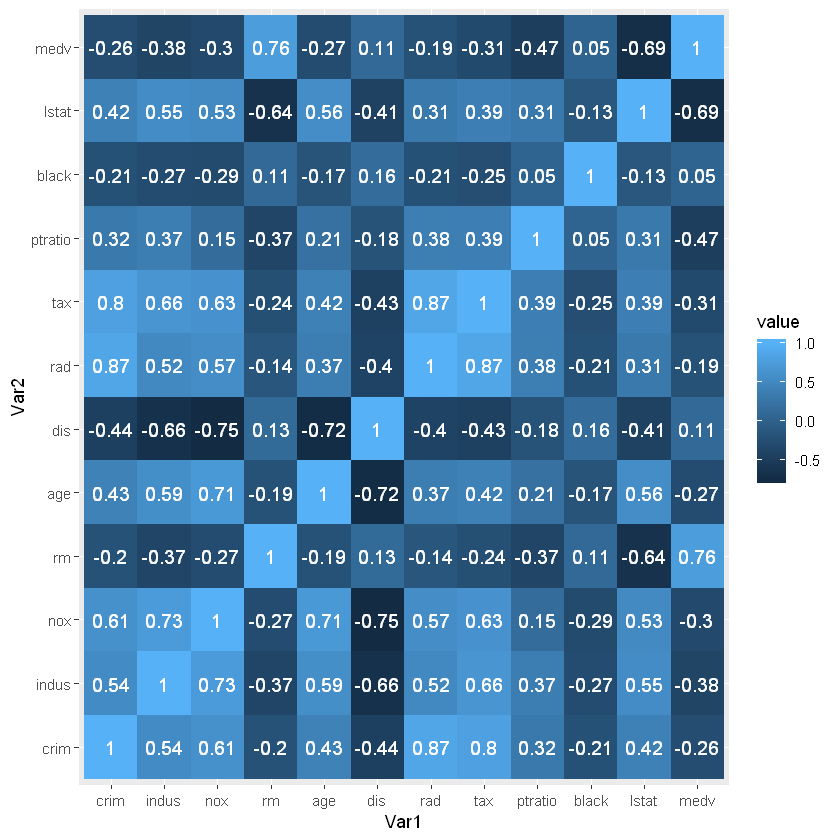

In [24]:
corr_mat <- round(cor(df),2)
 
melted_corr_mat <- melt(corr_mat)
head(melted_corr_mat)
 
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "white", size = 4)